In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#list of stocks in portfolio
stocks = ['AAPL','AMZN','GOOD','MSFT']

#download daily price data for each of the stocks in the portfolio
data = pd.DataFrame.from_csv('AAGM.csv')

data.sort_index(inplace=True)

In [3]:
#convert daily stock prices into daily returns
returns = data.pct_change()

In [4]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [5]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

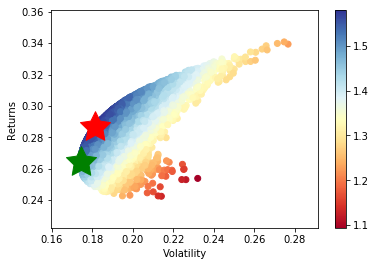

In [6]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [7]:
print(max_sharpe_port)

ret       0.286648
stdev     0.181569
sharpe    1.578728
AAPL      0.268844
AMZN      0.260349
GOOD      0.109101
MSFT      0.361706
Name: 8155, dtype: float64


In [8]:
print(min_vol_port)

ret       0.264270
stdev     0.174474
sharpe    1.514668
AAPL      0.304976
AMZN      0.072028
GOOD      0.316359
MSFT      0.306637
Name: 7277, dtype: float64
